# Loading and exploring Dataset

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

C:\Users\olabi\AppData\Local\Temp\ipykernel_19912\1795175845.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data =pd.read_csv('../data/maintenance_servicehours.csv')
display(data.head())

BoostPressure  EngineFuelRate  EngineLoad  EngineOilPressure  EngineRpm  \
0           3.12           88.19        31.7             587.67    1360.65   
1           8.23          109.86        34.6             692.82    1731.02   
2           3.05           64.07        22.3             572.30    1265.98   
3          12.03          104.47        33.5             685.22    1862.32   
4          10.08           71.29        21.4             612.62    1482.57   

   GroundSpeed  HaulDistance  Payload  TankFuelLevel  GearSelect  ServiceHours  
0          0.0           0.0      0.0          33.24         0.0    541.002751  
1          0.0           0.0      0.0          33.24         0.0    665.708336  
2          0.0           0.0      0.0          33.24         0.0    614.675853  
3          0.0           0.0      0.0          33.24         0.0    398.043887  
4          0.0           0.0      0.0          33.24         0.0    548.413577

In [3]:
# checking the shape of the dataframe
data.shape

(11500, 11)

In [4]:
# Checking dataframe information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BoostPressure      11500 non-null  float64
 1   EngineFuelRate     11500 non-null  float64
 2   EngineLoad         11500 non-null  float64
 3   EngineOilPressure  11500 non-null  float64
 4   EngineRpm          11500 non-null  float64
 5   GroundSpeed        11500 non-null  float64
 6   HaulDistance       11500 non-null  float64
 7   Payload            11500 non-null  float64
 8   TankFuelLevel      11500 non-null  float64
 9   GearSelect         11500 non-null  float64
 10  ServiceHours       11500 non-null  float64
dtypes: float64(11)
memory usage: 988.4 KB


In [5]:
# Are there duplicated rows?
data.duplicated().sum()

0

In [6]:
# checking for null values 
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

column_name  nulls_percentage
0       BoostPressure               0.0
1      EngineFuelRate               0.0
2          EngineLoad               0.0
3   EngineOilPressure               0.0
4           EngineRpm               0.0
5         GroundSpeed               0.0
6        HaulDistance               0.0
7             Payload               0.0
8       TankFuelLevel               0.0
9          GearSelect               0.0
10       ServiceHours               0.0

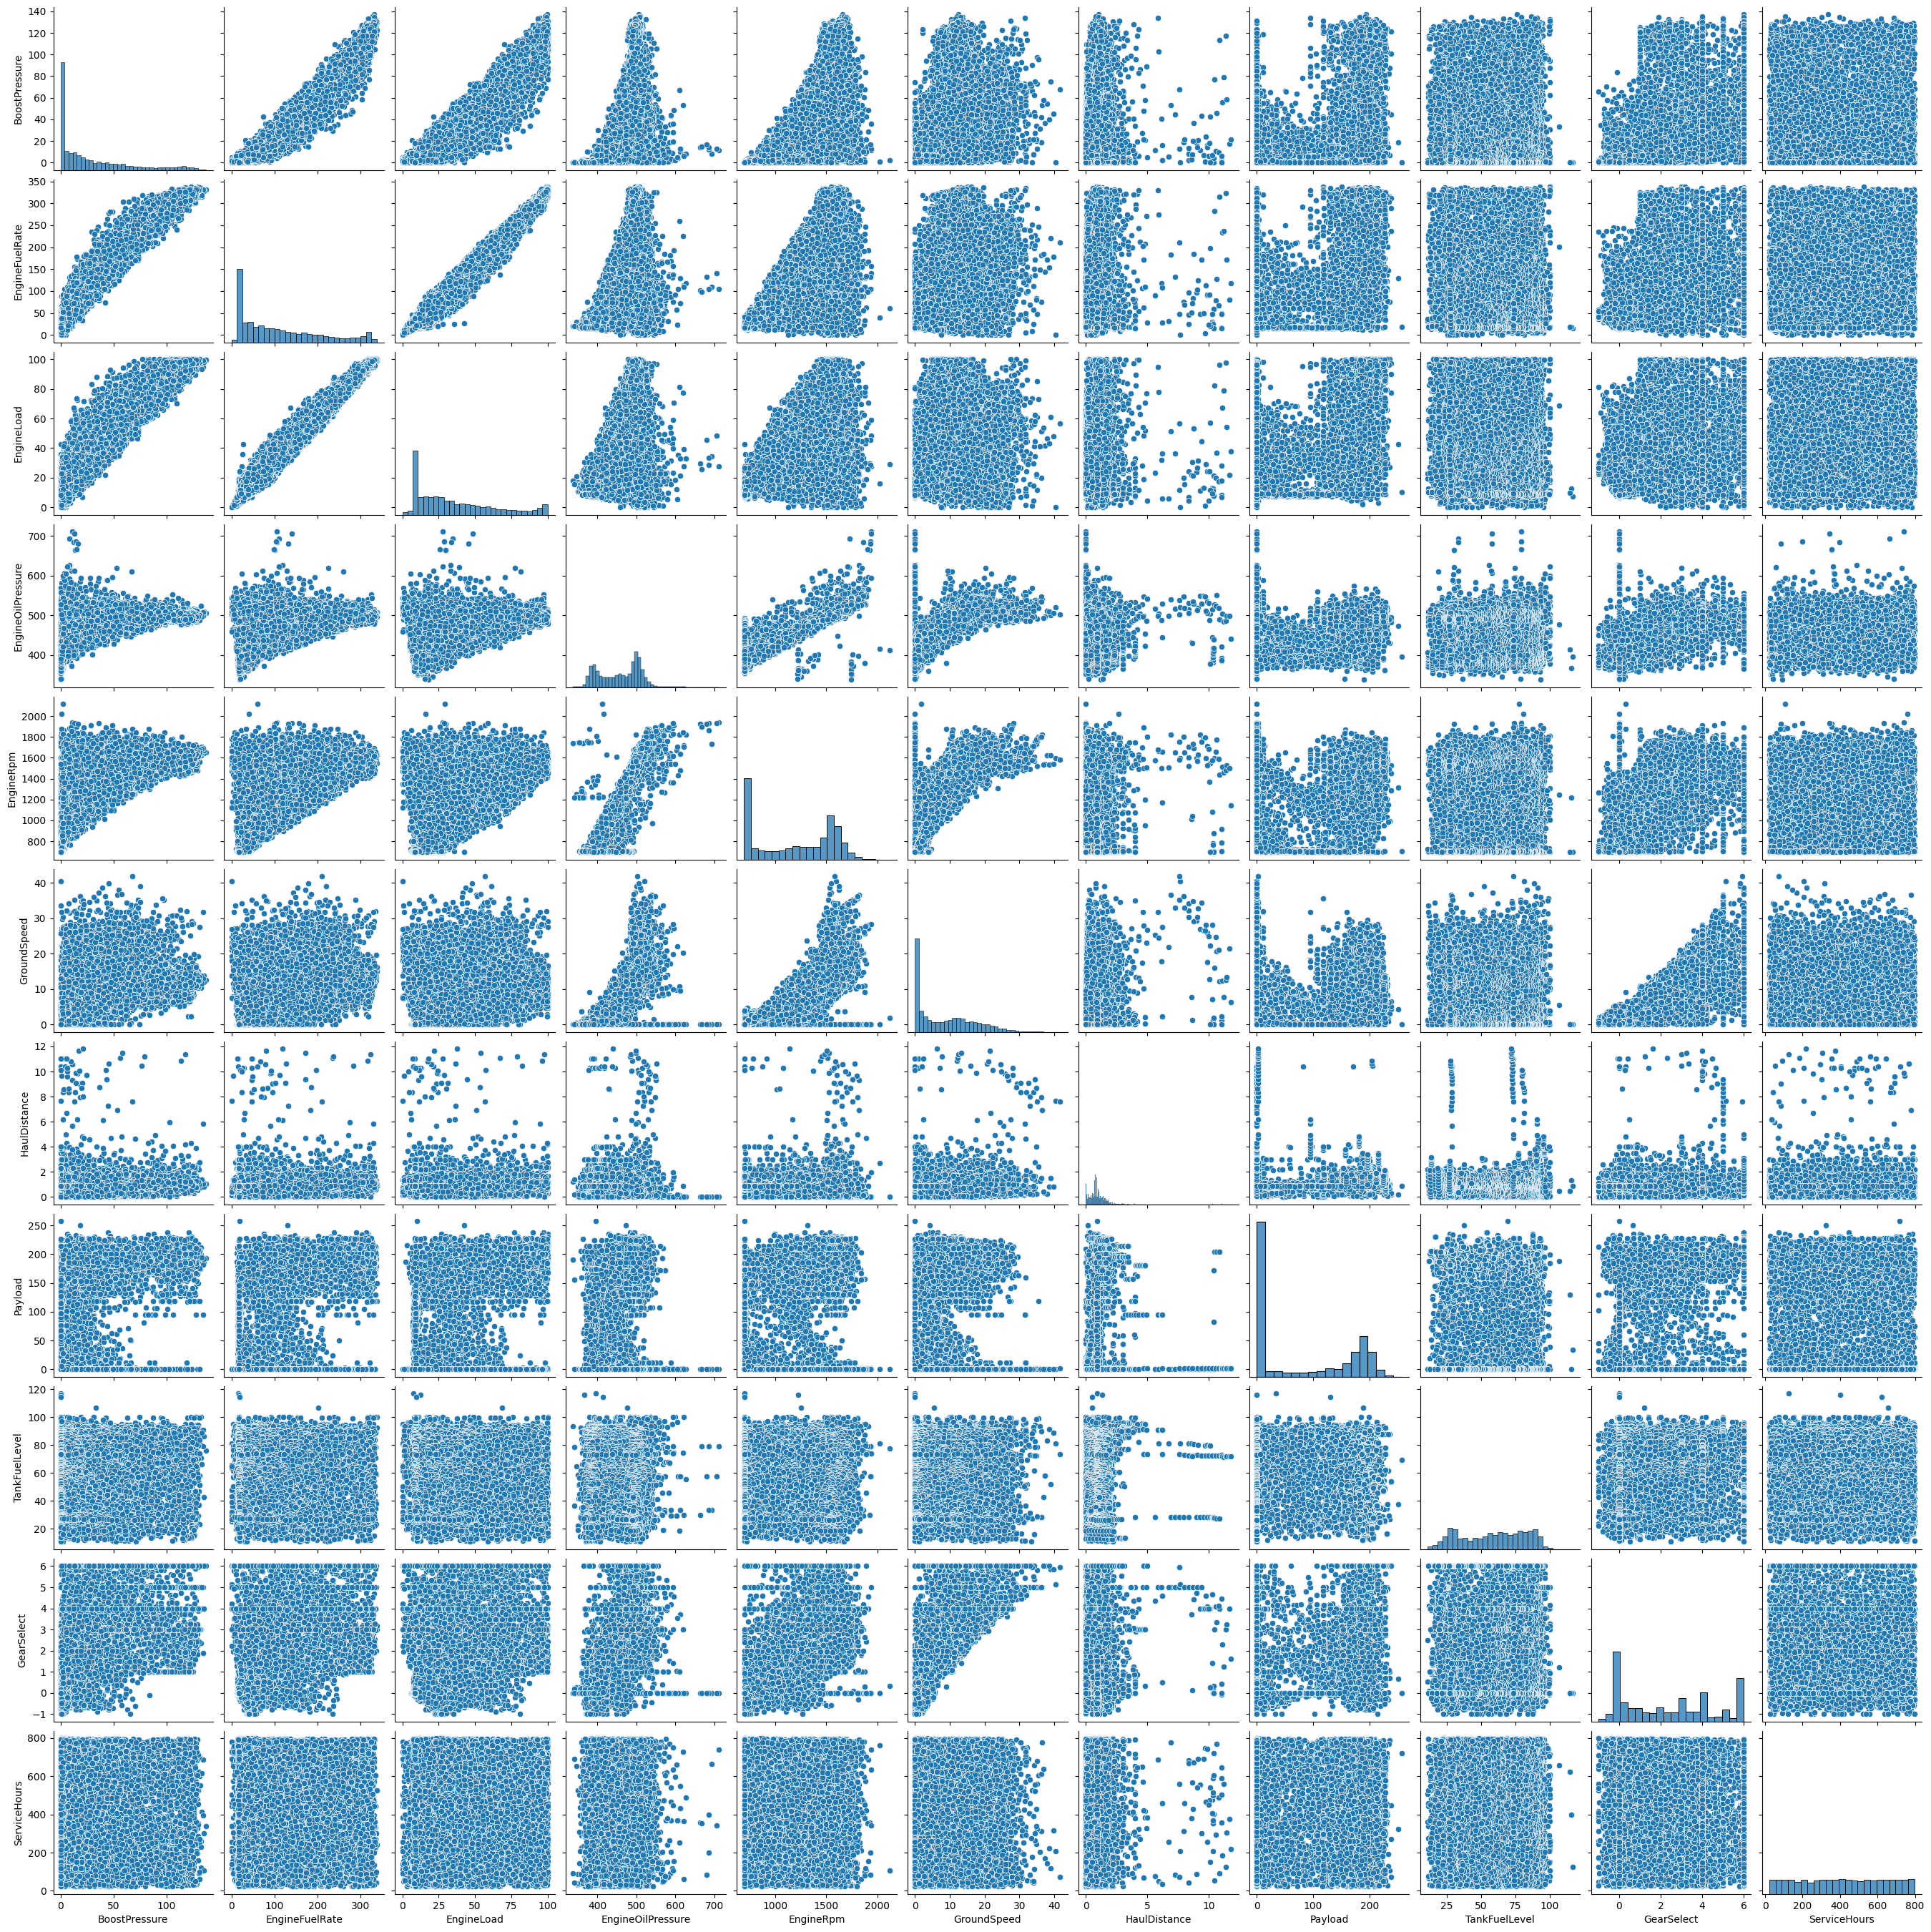

In [7]:
# using seaborn to construct the distribution plots for all variables
sns.pairplot(data)
plt.show()

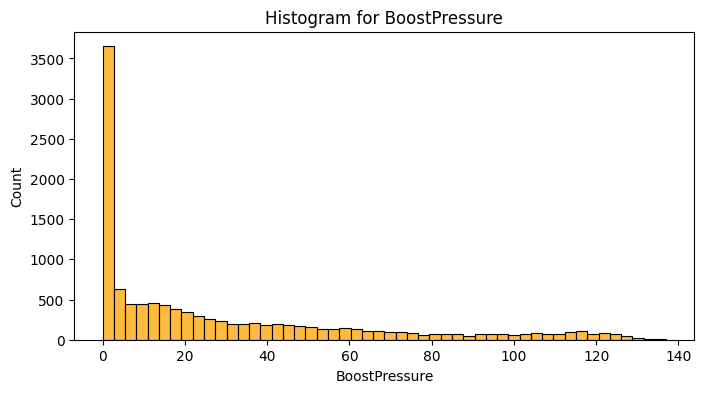

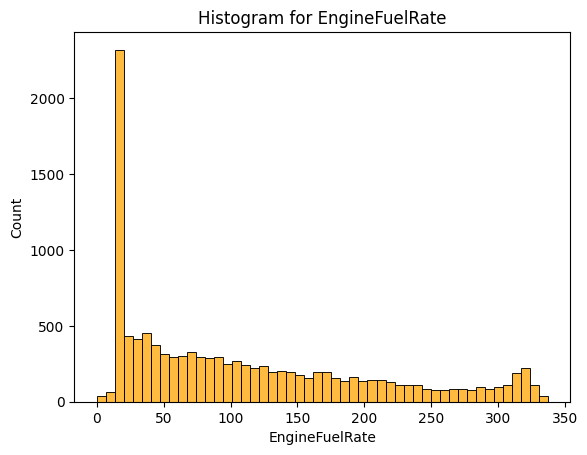

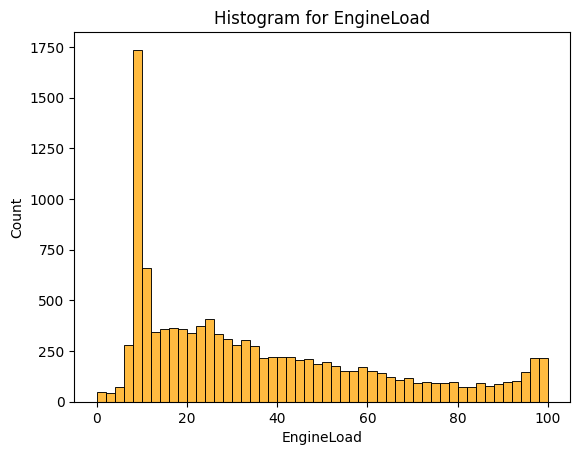

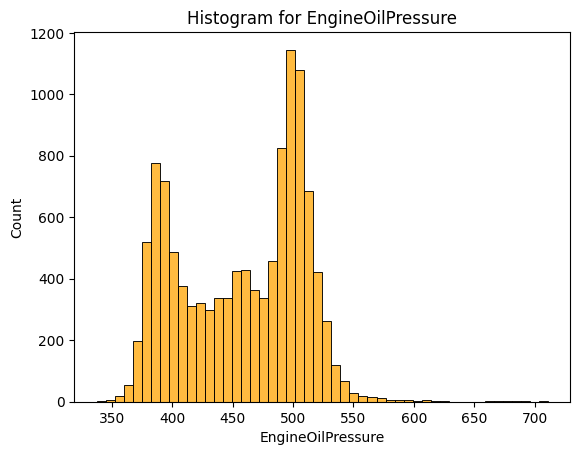

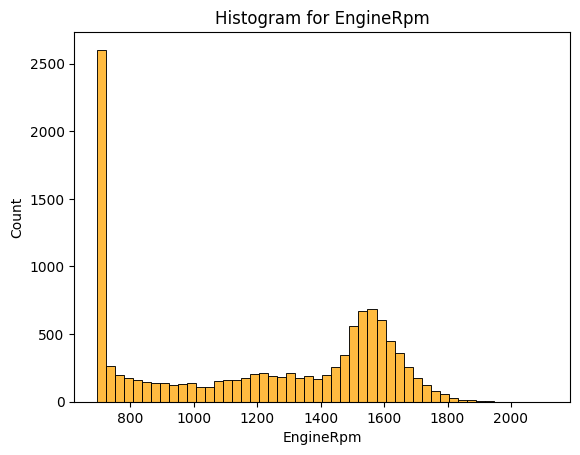

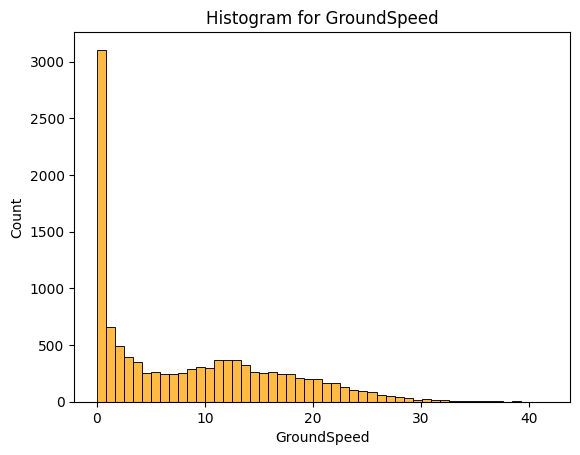

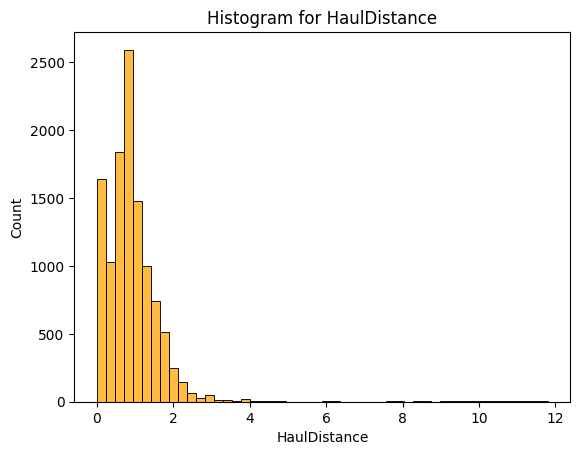

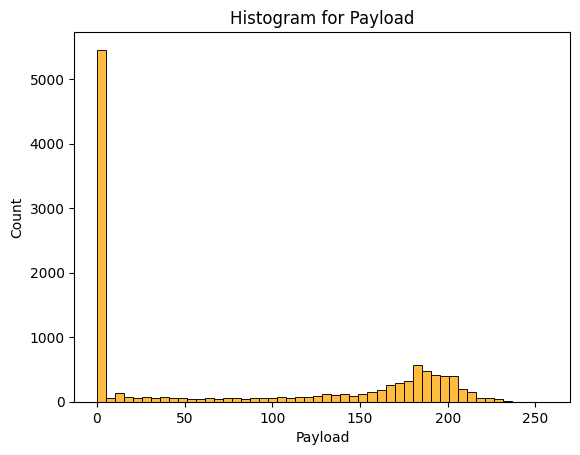

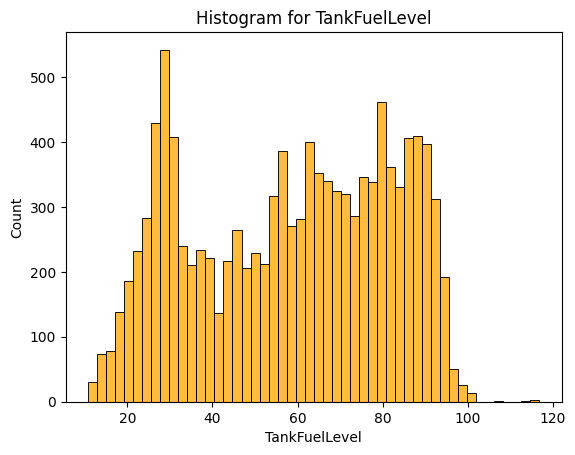

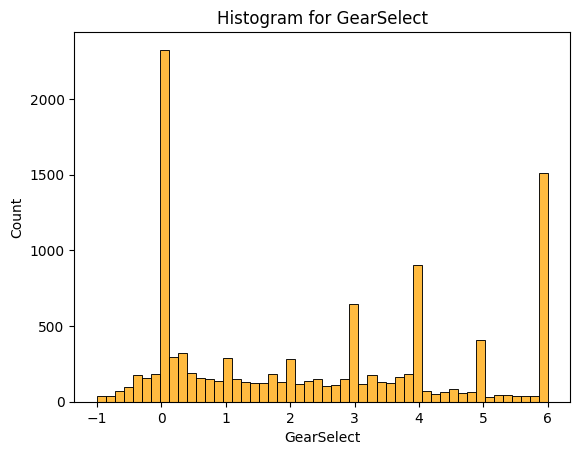

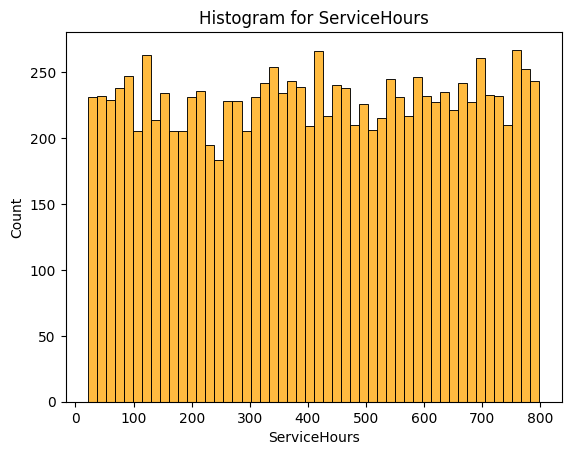

In [8]:
# Let's check the distribution plots for the variables
plt.figure(figsize=(8, 4))

for column in data.columns:
    sns.histplot(data[column], bins=50, color='orange')
    plt.title(f'Histogram for {column}')
    plt.show()


In [9]:
# checking the skewness for the variables

print(f"The skew of column {data.columns[0]} is {data[data.columns[0]].skew()}")
print(f"The skew of column {data.columns[1]} is {data[data.columns[1]].skew()}")
print(f"The skew of column {data.columns[2]} is {data[data.columns[2]].skew()}")
print(f"The skew of column {data.columns[3]} is {data[data.columns[3]].skew()}")
print(f"The skew of column {data.columns[4]} is {data[data.columns[4]].skew()}")
print(f"The skew of column {data.columns[5]} is {data[data.columns[5]].skew()}")
print(f"The skew of column {data.columns[6]} is {data[data.columns[6]].skew()}")
print(f"The skew of column {data.columns[7]} is {data[data.columns[7]].skew()}")
print(f"The skew of column {data.columns[8]} is {data[data.columns[4]].skew()}")
print(f"The skew of column {data.columns[9]} is {data[data.columns[5]].skew()}")
print(f"The skew of column {data.columns[10]} is {data[data.columns[6]].skew()}")
#print(f"The skew of column {data.columns[7]} is {data[data.columns[7]].skew()}")


The skew of column BoostPressure is 1.3057472211645753
The skew of column EngineFuelRate is 0.8386786005860877
The skew of column EngineLoad is 0.8618642251547528
The skew of column EngineOilPressure is -0.14541056708819736
The skew of column EngineRpm is -0.17826076777004063
The skew of column GroundSpeed is 0.7090318102696404
The skew of column HaulDistance is 5.77407477351312
The skew of column Payload is 0.3304764076986788
The skew of column TankFuelLevel is -0.17826076777004063
The skew of column GearSelect is 0.7090318102696404
The skew of column ServiceHours is 5.77407477351312


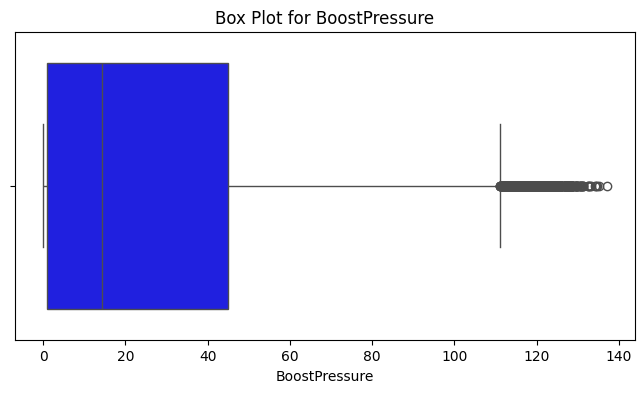

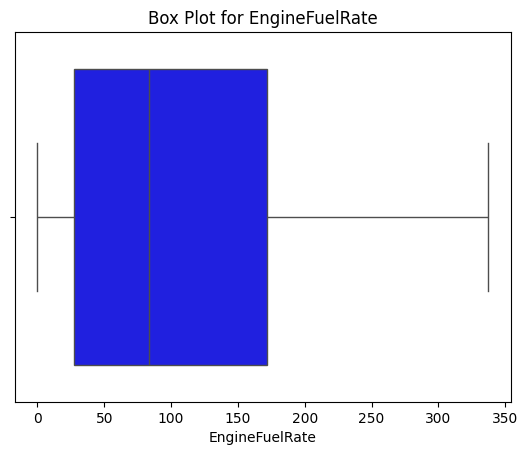

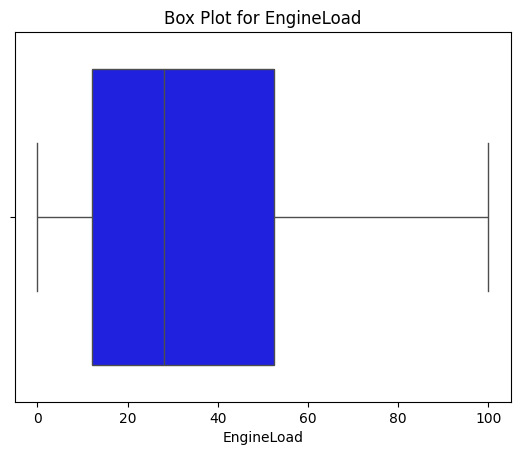

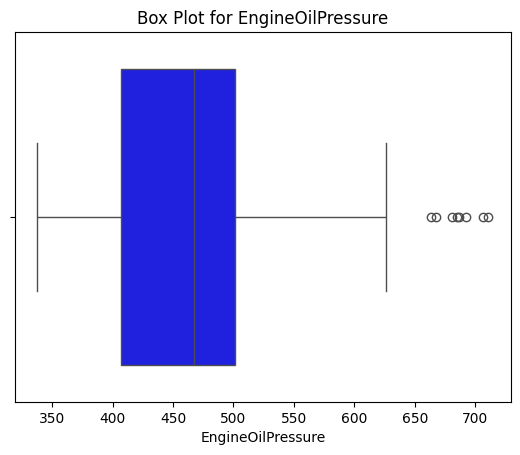

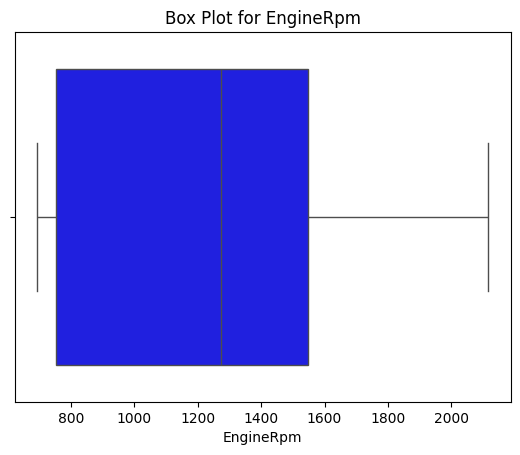

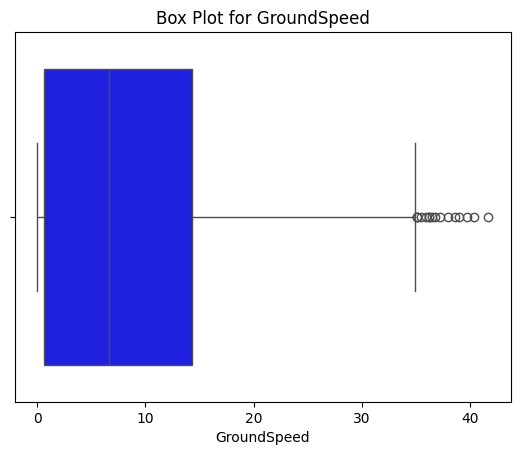

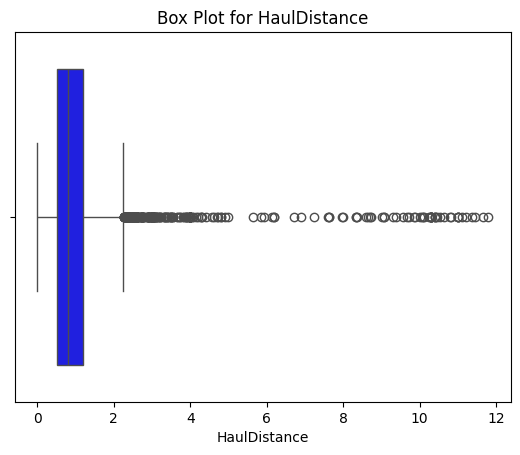

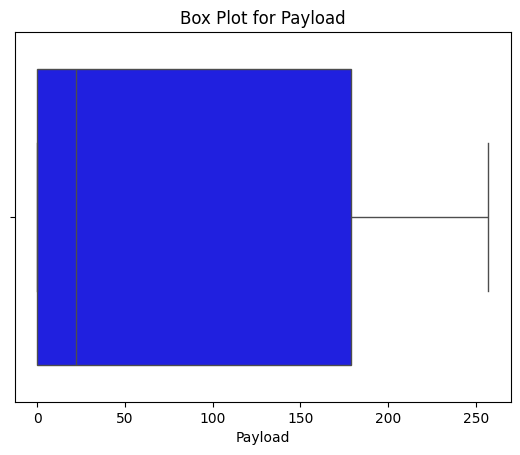

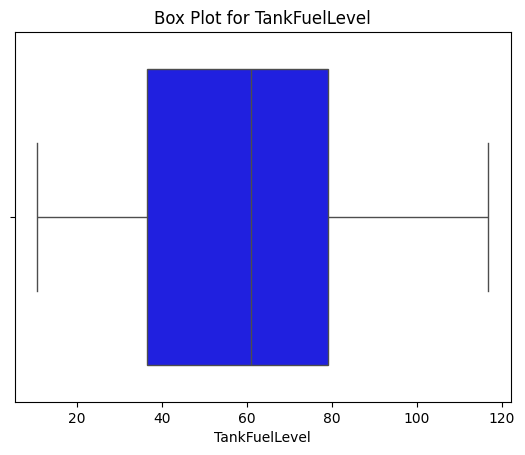

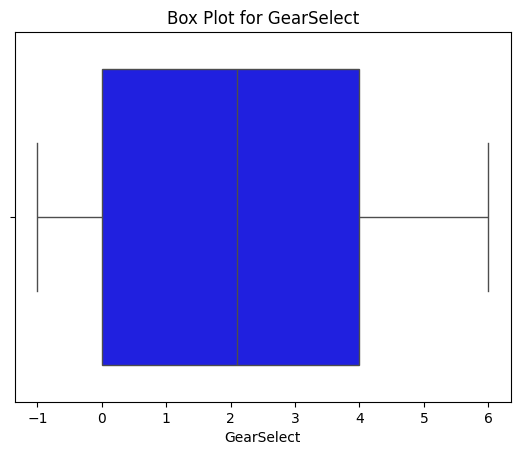

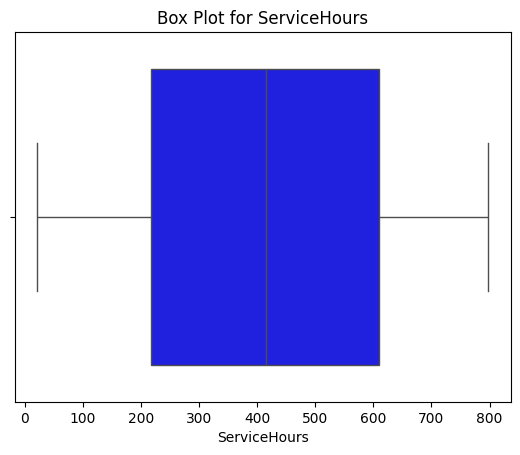

In [10]:
# box plots to check for outliers

plt.figure(figsize=(8, 4))
for column in data.columns:
    sns.boxplot(x=data[column], color='blue')
    plt.title(f'Box Plot for {column}')
    plt.show()

In [11]:
# there is a lot of outliers for BoostPressure, EngineOilPressure, GroundSpeed, HaulDistance. 

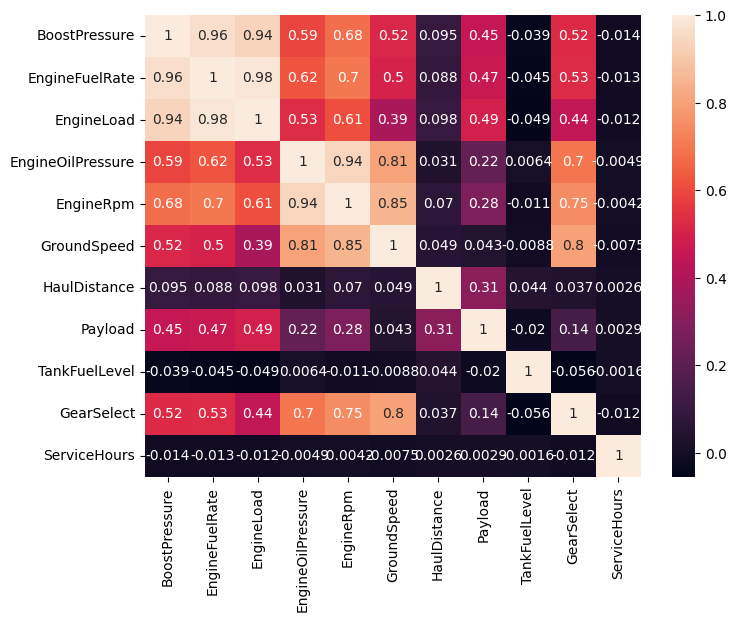

In [19]:
# Correlation matrix for the variables
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, ax = ax)
plt.show()

# Prediction using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# X/y split
y = data['ServiceHours']
X = data.drop(['ServiceHours'], axis=1)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Setting the model
lm = LinearRegression()

# Creating a dataframe from the np arrays
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

In [17]:
# the range of values are different for each column. 
# there is a need to transform the X columns

from sklearn.preprocessing import PowerTransformer
import pickle

transformer = PowerTransformer()

transformer.fit(X_train_df) 

path = "transformers/"
transformer_file_name = "power_transformer.pkl"

with open(path+transformer_file_name, "wb") as file:
    pickle.dump(transformer, file)

X_trained_transformed = transformer.transform(X_train_df) 
X_test_transformed = transformer.transform(X_test_df) 

# We create new Pandas DataFrames out of the Numpy arrays.
X_trained_transformed= pd.DataFrame(X_trained_transformed, columns=X.columns)
X_test_transformed  = pd.DataFrame(X_test_transformed,  columns=X.columns)


X_trained_transformed.head()

BoostPressure  EngineFuelRate  EngineLoad  EngineOilPressure  EngineRpm  \
0       0.421451        0.657933    0.681863          -0.101041   0.223099   
1       0.748718        0.861788    0.982959           0.018886  -0.029871   
2       0.412041        0.030147   -0.303517           0.820708   0.910541   
3       0.781066        0.772515    0.533330           1.192899   1.173106   
4       1.443869        1.329568    1.318770           0.897509   1.133891   

   GroundSpeed  HaulDistance   Payload  TankFuelLevel  GearSelect  
0     0.261872     -2.044658 -1.041681       1.021744   -0.206930  
1     0.094545      0.204503  1.041426       1.221015   -0.369890  
2     1.151761      0.188467  1.096789       0.773372    1.404522  
3     1.003463     -0.914364 -1.041681      -0.092169    0.430913  
4     1.164187      0.416990  0.912459      -1.263108    1.404522

In [15]:
# training the multivariate linear model

lm = LinearRegression()
lm.fit(X_trained_transformed, y_train) 



LinearRegression()

In [16]:
import os
import pickle

# Saving the linear model

path = "models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "linear_model.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(lm, file)

# Model evaluation

In [22]:
# Model Predictions
y_train_pred = lm.predict(X_trained_transformed)
y_test_pred  = lm.predict(X_test_transformed)

In [23]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)

In [24]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

Set        Real   Predicted      Errors
0  Train  329.194417  409.313048  -80.118631
1  Train  514.368552  415.150532   99.218020
2  Train   65.308211  417.508879 -352.200668
3  Train  715.203554  412.519771  302.683782
4  Train  377.179417  412.095789  -34.916371

In [25]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    
    '''
    # Mean absolute error
    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE','MSE','RMSE','R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [26]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

Metric     Train      Test
0    MAE    195.18    194.08
1    MSE  50852.04  50760.76
2   RMSE    225.50    225.30
3     R2      0.00     -0.00

# Plotting model predictions

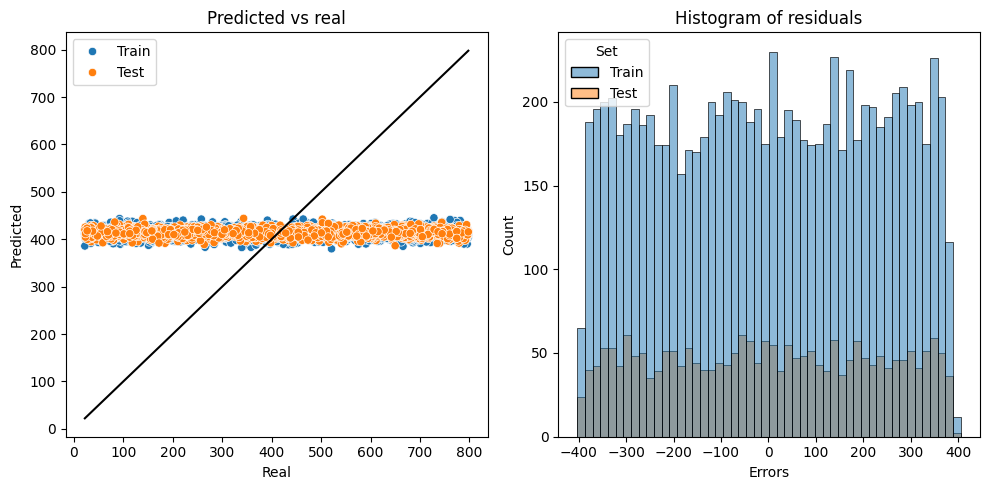

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()